In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('logistic.csv')
data.head(3)

,Gender,Age,Salary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [3]:
data.drop(columns='Gender',inplace=True)
data.head(3)

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [4]:
data.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [5]:
x=data.iloc[:,:-1]

In [6]:
y=data['Purchased']

In [7]:
from imblearn.over_sampling import RandomOverSampler

In [8]:
ros=RandomOverSampler()

In [9]:
ro_x,ro_y = ros.fit_resample(x,y)

C:\Program Files\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [10]:
ro_y.value_counts()

Purchased
0    257
1    257
Name: count, dtype: int64

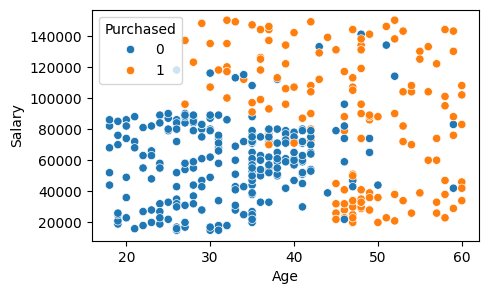

In [48]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Age',y='Salary',data=data, hue='Purchased')
plt.show()

In [12]:
#from sklearn.preprocessing import PolynomialFeatures

In [13]:
#poly=PolynomialFeatures()

In [14]:
#x_poly=poly.fit_transform(ro_x)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test =train_test_split(ro_x,ro_y,test_size=0.2,random_state=42)

In [35]:
len(x_train)

411

In [36]:
len(x_test)

103

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr=LogisticRegression()

In [39]:
lr.fit(x_test,y_test)

LogisticRegression()

In [40]:
#lr.predict(poly.fit_transform([[19,19000]]))

In [53]:
lr.predict([[47,25000]])

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [42]:
lr.score(x_test,y_test)*100

87.37864077669903

In [45]:
from mlxtend.plotting import plot_decision_regions # pip install mlxtend  hint you can't use more than 3 element it support only 2 element

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

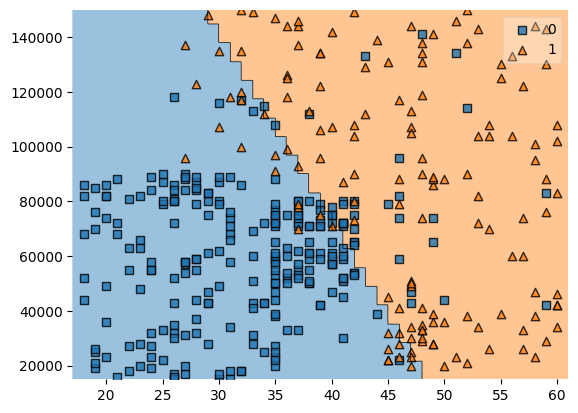

In [46]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)